In [1]:
from tensorflow.keras import models, layers
from ngdlm import models as ngdlmodels
from ngdlm import utils as ngdlutils
from tensorflow.keras.datasets import mnist
import numpy as np

# Train- and test-data.

In [2]:
(x_input_train, _), (x_input_test, y_output_test) = mnist.load_data()
x_input_train = x_input_train.astype("float32") / 255.0
x_input_test = x_input_test.astype("float32") / 255.0
print(x_input_train.shape)
print(x_input_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Plain autoencoder.

In [3]:
ae = ngdlutils.build_dense_ae(input_shape=(28, 28), latent_dim=32)
ae.compile(optimizer='adadelta', loss='binary_crossentropy')
ae.summary()

# Train.
print("Train...")
history = ae.fit(
        x_input_train, x_input_train,
        epochs=50,
        batch_size=128,
        shuffle=True,
        validation_data=(x_input_test, x_input_test)
    )
    
# Evaluate.
print("Evaluate...")
loss = ae.evaluate(x_input_test, x_input_test)
print("Loss:", loss)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Encoder:
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
Decoder:
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
____________________________________

60000/60000 [==============================] - 8s 132us/sample - loss: 0.6468 - val_loss: 0.6449
Epoch 48/50
60000/60000 [==============================] - 8s 128us/sample - loss: 0.6440 - val_loss: 0.6420
Epoch 49/50
60000/60000 [==============================] - 8s 127us/sample - loss: 0.6411 - val_loss: 0.6390
Epoch 50/50
60000/60000 [==============================] - 8s 138us/sample - loss: 0.6380 - val_loss: 0.6358 loss: 0.6
Evaluate...
10000/10000 [==============================] - 2s 245us/sample - loss: 0.6358
Loss: 0.6358359786987304


# Visualizing plain autoencoder.

Rendering history...


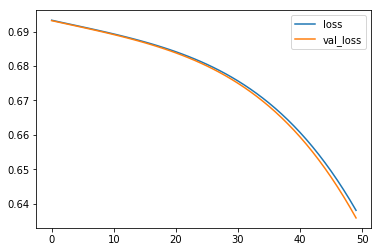

Rendering reconstructions...


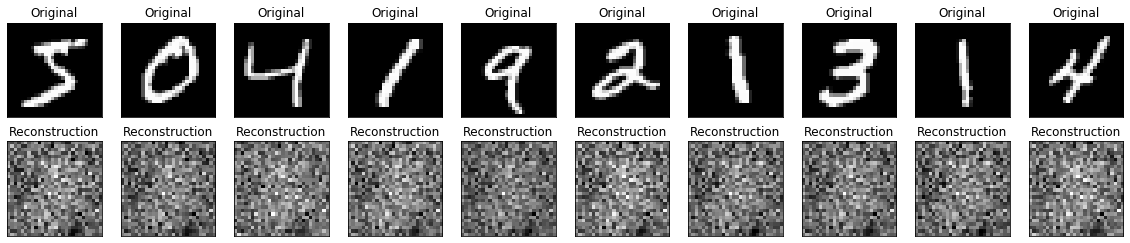

Rendering latent-space...


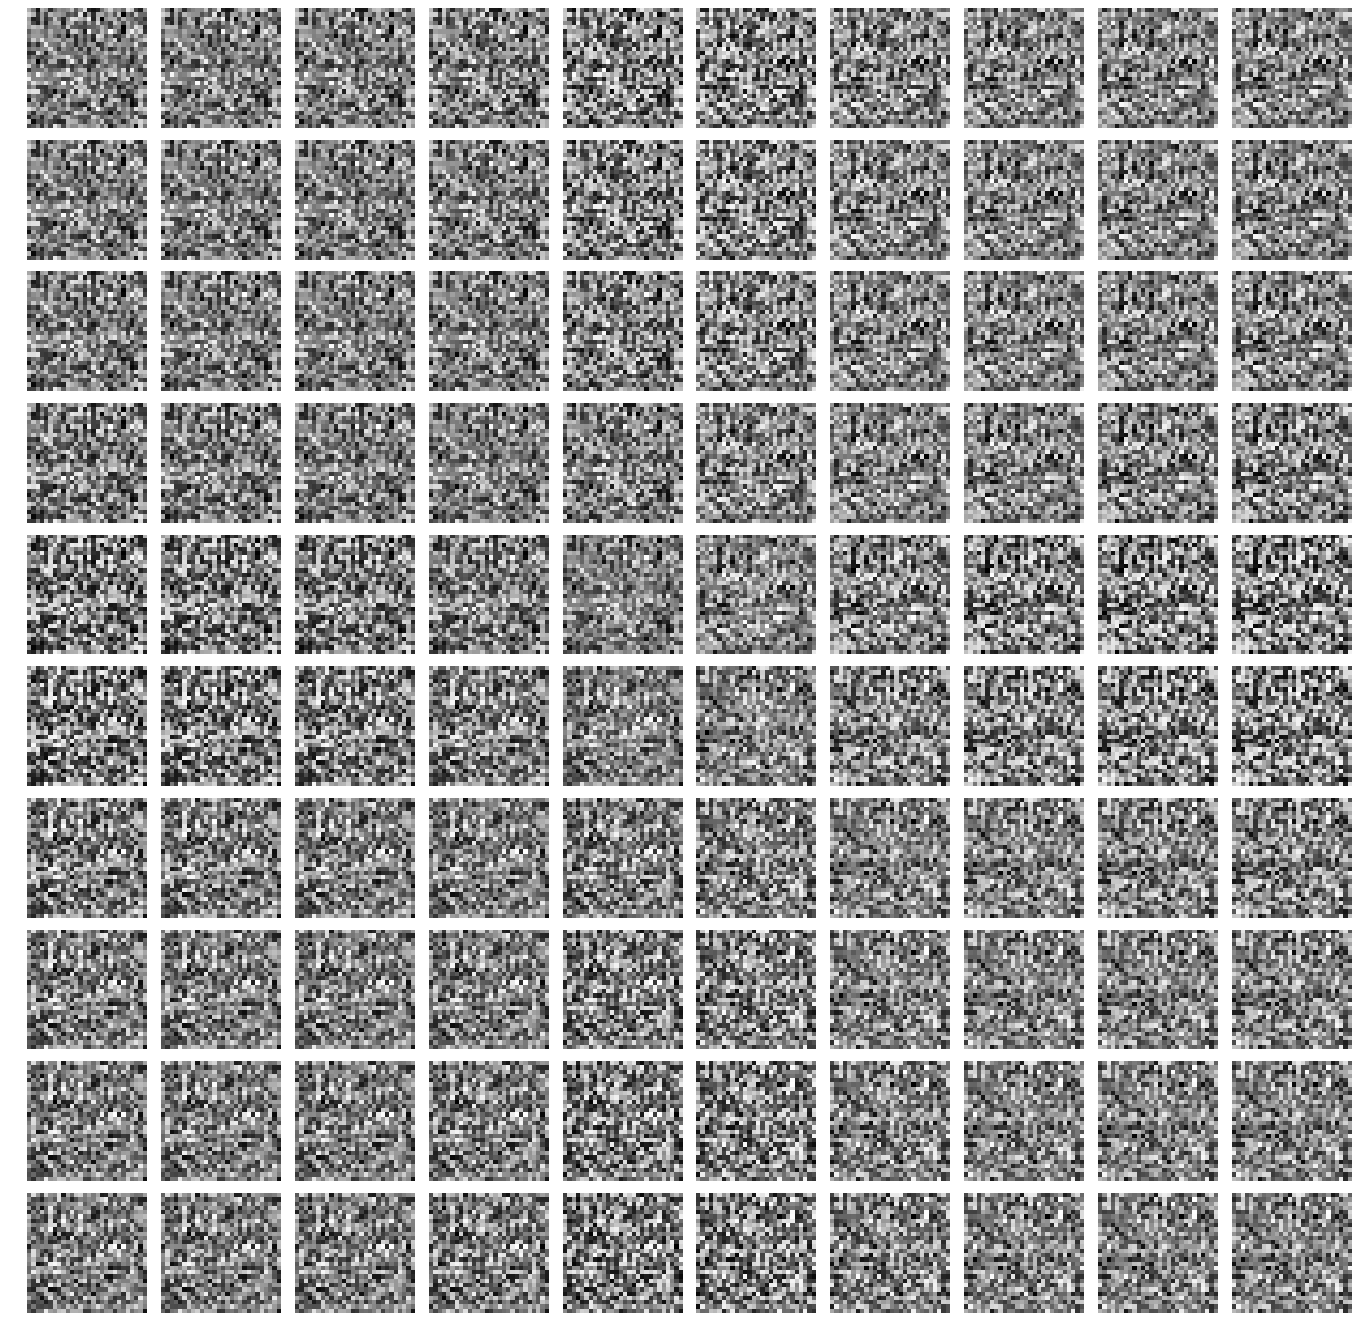

Rendering encodings...


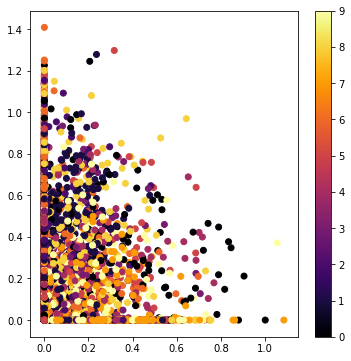

In [4]:
print("Rendering history...")
ngdlutils.render_history(history)

print("Rendering reconstructions...")
ngdlutils.render_image_reconstructions(ae, x_input_train[0:10])

print("Rendering latent-space...")
ngdlutils.render_image_latent_space(ae.decoder, 10)

print("Rendering encodings...")
ngdlutils.render_encodings(ae.encoder, x_input_test, y_output_test)